In [161]:
import numpy as np
import cv2
import os
from matplotlib import pyplot as plt

FILES_DIR = os.path.abspath('images')

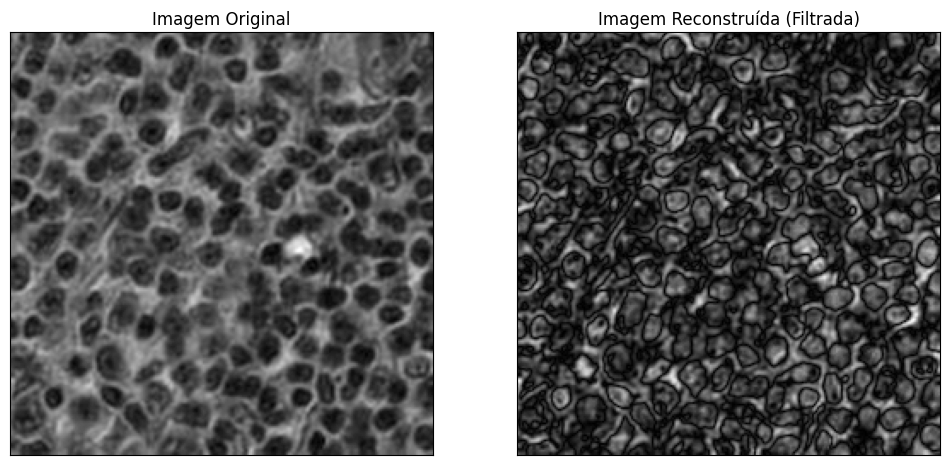

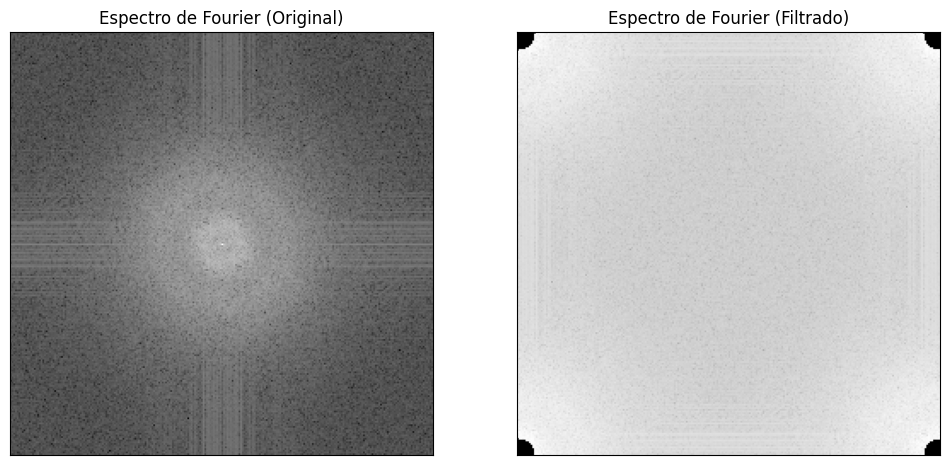

In [162]:
image = cv2.imread(f'{FILES_DIR}/image.png', 0)

dft = cv2.dft(np.float32(image), flags = cv2.DFT_COMPLEX_OUTPUT)
dftShift = np.fft.fftshift(dft)

h, w = image.shape
centerH = h // 2
centerW = w // 2

radius = 10
filter = np.ones((h, w, 2), np.uint8)
y, x = np.ogrid[:h, :w]
mask = (x - centerH) ** 2 + (y - centerW) ** 2 <= radius ** 2
filter[mask] = 0

filteredShift = dftShift * filter
filteredShift = np.fft.ifftshift(filteredShift)

filteredImage = cv2.idft(filteredShift)
filteredImage = cv2.magnitude(filteredImage[:, :, 0], filteredImage[:, :, 1])

magnitudeSpectrumOriginal = 20 * np.log(cv2.magnitude(dftShift[:, :, 0], dftShift[:, :, 1]) + 1e-10)
magnitudeSpectrumFiltered = 20 * np.log(cv2.magnitude(filteredShift[:, :, 0], filteredShift[:, :, 1]) + 1e-10)

plt.figure(figsize = (12, 6))
plt.subplot(121), plt.imshow(image, cmap = 'gray')
plt.title('Imagem Original'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(filteredImage, cmap = 'gray')
plt.title('Imagem Reconstruída (Filtrada)'), plt.xticks([]), plt.yticks([])
plt.savefig(f'{FILES_DIR}/originalFilteredImage.png')
plt.show()

plt.figure(figsize = (12, 6))
plt.subplot(121), plt.imshow(magnitudeSpectrumOriginal, cmap = 'gray')
plt.title('Espectro de Fourier (Original)'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitudeSpectrumFiltered, cmap = 'gray')
plt.title('Espectro de Fourier (Filtrado)'), plt.xticks([]), plt.yticks([])
plt.savefig(f'{FILES_DIR}/originalFilteredSpectrum.png')
plt.show()